In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import nltk
import random
import pandas as pd
from sklearn.metrics import accuracy_score
from gensim.models import Word2Vec
import torch.nn as nn
from nltk.tokenize import RegexpTokenizer
import torch.optim as optim
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import numpy as np
import re 
from tensorflow.keras.preprocessing.sequence import pad_sequences

import torch
from torch.utils.data import Dataset, DataLoader
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /home/jupyter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [135]:
train=pd.read_csv('train.csv',encoding='UTF-8',delimiter=';')
test=pd.read_csv('test.csv',encoding='UTF-8',delimiter=';')

In [136]:
train=train.drop('id',axis=1)
test=test.drop('id',axis=1)

In [137]:
train

,comment,toxic
0,Бесполезно что-то пытаться донести так до люде...,0
1,А свиньи разве умеют читать?\n,1
2,Червепидорские страны парашной конфедерации -К...,1
3,"Нет, это не так. Я зашёл сюда специально за эт...",1
4,"Дополнение: Дентрен, та чилийская грязь, на ко...",0
...,...,...
14995,"""\n\nОбратите внимание: дополнения к категория...",0
14996,Борцовские арены\n\nЯ собираюсь заключить с ва...,0
14997,"Занялась свинособака бесплатно сексом, так еще...",1
14998,"Хуйло, почему ты считаешь что постить с аватар...",1


In [138]:

def clean_comments(comments):
    comments = comments.replace('\n\n', ' ')
    comments = comments.replace('\n', ' ')
    comments = comments.strip()
    return comments
train['comment'] = train['comment'].apply(lambda x: re.sub('\t|\r', ' ', x))
train['comment'] = train['comment'].apply(clean_comments)

In [139]:
train

,comment,toxic
0,Бесполезно что-то пытаться донести так до люде...,0
1,А свиньи разве умеют читать?,1
2,Червепидорские страны парашной конфедерации -К...,1
3,"Нет, это не так. Я зашёл сюда специально за эт...",1
4,"Дополнение: Дентрен, та чилийская грязь, на ко...",0
...,...,...
14995,""" Обратите внимание: дополнения к категориям B...",0
14996,Борцовские арены Я собираюсь заключить с вами ...,0
14997,"Занялась свинособака бесплатно сексом, так еще...",1
14998,"Хуйло, почему ты считаешь что постить с аватар...",1


<Axes: >

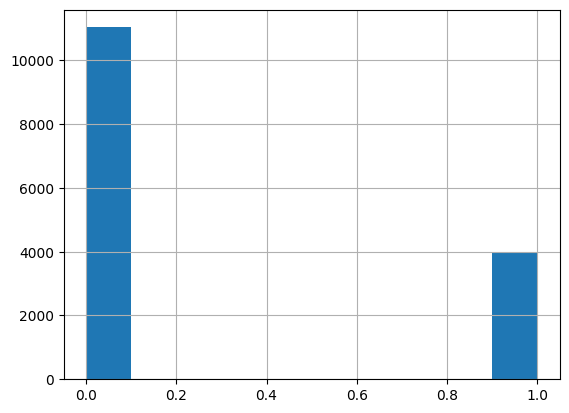

In [140]:
train['toxic'].hist()

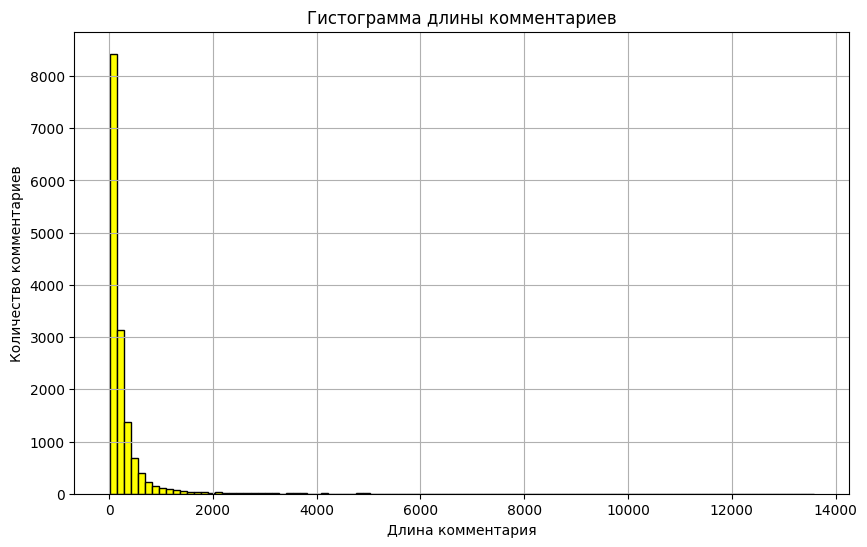

In [141]:
plt.figure(figsize=(10, 6))
plt.hist(train['comment'].str.len(), bins=100, color='yellow', edgecolor='black')
plt.title('Гистограмма длины комментариев')
plt.xlabel('Длина комментария')
plt.ylabel('Количество комментариев')
plt.grid(True)
plt.show()

In [142]:
train.duplicated().sum()

134

In [143]:
train=train.drop_duplicates()

In [144]:
train.reset_index(inplace=True,drop=True)

In [145]:
test

,comment
0,"Или эти программисты, зарабатывающие 3кк с, вс..."
1,"0,3 с коррекцией, т.е в очках или линзах.\n"
2,"...\n\nДа, здесь все идет. Это моя страница об..."
3,Да. Но отчасти в этом есть вина и самой теслы....
4,нужен баланс между труд отдых зачем? бывали сл...
...,...
5407,"Кроме того, в комплектацию входят прибор ночно..."
5408,"На самом деле, вся эта статья нуждается в дора..."
5409,"Фиговый регистратор, можно и 24 часа вместить ..."
5410,"я не из бедной семьи, но в подростковом возрас..."


In [146]:
train_df, temp_df = train_test_split(train, test_size=0.3)  
val_df, test_df = train_test_split(temp_df, test_size=0.5)

In [147]:
test

,comment
0,"Или эти программисты, зарабатывающие 3кк с, вс..."
1,"0,3 с коррекцией, т.е в очках или линзах.\n"
2,"...\n\nДа, здесь все идет. Это моя страница об..."
3,Да. Но отчасти в этом есть вина и самой теслы....
4,нужен баланс между труд отдых зачем? бывали сл...
...,...
5407,"Кроме того, в комплектацию входят прибор ночно..."
5408,"На самом деле, вся эта статья нуждается в дора..."
5409,"Фиговый регистратор, можно и 24 часа вместить ..."
5410,"я не из бедной семьи, но в подростковом возрас..."


## АУГМЕНТАЦИЯ

In [148]:
import requests

url = 'https://raw.githubusercontent.com/s-nlp/inappropriate-sensitive-topics/main/Version2/appropriateness/train.csv'
response = requests.get(url)
response = requests.get(url)

with open('train.csv', 'wb') as f:
    f.write(response.content)

In [149]:
def round_val(val):
    return round(val)

In [150]:
df = pd.read_csv('train.csv')
label_name = 'inappropriate'
threshold = 0
df = df[(df[label_name] >= 1-threshold)|(df[label_name] <=threshold)]
df[label_name] = df[label_name].apply(round_val)
df=df[['text','inappropriate']]

In [151]:
def clean_comments(comments):
    comments = comments.replace('\n\n', ' ')
    comments = comments.replace('\n', ' ')
    comments = comments.strip()
    return comments
df['text'] = df['text'].apply(lambda x: re.sub('\t|\r', ' ', x))
df['text'] = df['text'].apply(clean_comments)

In [152]:
df=df.iloc[:50000]
df.columns=['comment','toxic']

In [153]:
DF=pd.concat([train,df],axis=0)

In [299]:
from datasets import load_dataset

dataset = load_dataset("AlexSham/Toxic_Russian_Comments")

In [300]:
df2= pd.DataFrame(dataset['train'])

In [155]:
df2['text'] = df2['text'].apply(lambda x: re.sub('\t|\r', ' ', x))
df2['text'] = df2['text'].apply(clean_comments)

In [156]:
df2.columns=['comment','toxic']

In [157]:
DF=pd.concat([DF,df2],axis=0)

In [158]:
DF.reset_index(drop=True,inplace=True)

In [159]:
train_df, temp_df = train_test_split(DF, test_size=0.3)  
val_df, test_df = train_test_split(temp_df, test_size=0.5)

In [160]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('russian')) 

def preprocess_text(text):
    text = re.sub(r'\[', '', text)
    text = re.sub(r'\]', '', text)
    text = text.lower()
    text = re.sub(r'[^а-яА-ЯёЁa-zA-Z0-9 ,.;!?\'\"-]', '', text)
    text = re.sub(r'[.,;!?\'\"-]', ' ', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)


[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jupyter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [161]:
train_df['comment']=train_df['comment'].apply(preprocess_text)
val_df['comment'] = val_df['comment'].apply(preprocess_text)
test_df['comment'] = test_df['comment'].apply(preprocess_text)


In [162]:
def Tokenizer(text):
    return re.findall(r'\b\w+\b', text)
train_df['token1']=train_df['comment'].apply(Tokenizer)
val_df['token1']=val_df['comment'].apply(Tokenizer)

In [163]:
train_sentences = train_df['token1'].tolist()
val_sentences=val_df['token1'].tolist()

word2vec_model = Word2Vec(sentences=train_sentences + val_sentences, vector_size=100, window=5, min_count=1, workers=4)



In [164]:
def text_to_w2v(text, word2vec_model, vector_size):
    vectors = []
    for word in text:
        if word in word2vec_model.wv:
            vectors.append(word2vec_model.wv[word])
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(vector_size)

X_train = np.vstack(train_df['token1'].apply(lambda x: text_to_w2v(x, word2vec_model, 100)))
X_val = np.vstack(val_df['token1'].apply(lambda x: text_to_w2v(x, word2vec_model, 100)))
y_train = np.array(train_df['toxic'])
y_val = np.array(val_df['toxic'])

X_train_tensor = torch.tensor(X_train).float()
X_val_tensor = torch.tensor(X_val).float()
y_train_tensor = torch.tensor(y_train)
y_val_tensor = torch.tensor(y_val)

In [165]:
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = CustomDataset(X_train_tensor, y_train_tensor)
val_dataset = CustomDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

In [166]:
class Classifier(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, num_classes, dropout_prob=0.5):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_size3, num_classes)
        self.dropout = nn.Dropout(dropout_prob)
        self.batchnorm1 = nn.BatchNorm1d(hidden_size1)
        self.batchnorm2 = nn.BatchNorm1d(hidden_size2)
        self.batchnorm3 = nn.BatchNorm1d(hidden_size3)

    def forward(self, x):
        out = self.fc1(x)
        out = self.batchnorm1(out)
        out = self.relu1(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.batchnorm2(out)
        out = self.relu2(out)
        out = self.dropout(out)
        out = self.fc3(out)
        out = self.batchnorm3(out)
        out = self.relu3(out)
        out = self.dropout(out)
        out = self.fc4(out)
        return out

input_size = 100  #
hidden_size1 = 256
hidden_size2 = 128
hidden_size3 = 64
num_classes = 1

model = Classifier(input_size, hidden_size1, hidden_size2, hidden_size3, num_classes)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epochs = 15
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs.float())
        labels = labels.view(-1, 1)  
        loss = criterion(outputs, labels.float())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in val_loader:
        outputs = model(inputs.float())
        predicted = (outputs > 0.5).int().flatten()  
        total += labels.size(0)
        correct += (predicted == labels.float()).sum().item()

accuracy = correct / total
print(f'Validation Accuracy: {100*accuracy}%')

Epoch 1/15, Loss: 0.4054070898014568
Epoch 2/15, Loss: 0.3913927920323312
Epoch 3/15, Loss: 0.3871904827994528
Epoch 4/15, Loss: 0.3844951757630859
Epoch 5/15, Loss: 0.38226520622322735
Epoch 6/15, Loss: 0.38105442999291056
Epoch 7/15, Loss: 0.38003105445562396
Epoch 8/15, Loss: 0.3789626278866675
Epoch 9/15, Loss: 0.3785311600397717
Epoch 10/15, Loss: 0.37770761771998074
Epoch 11/15, Loss: 0.37670866219762694
Epoch 12/15, Loss: 0.37545362692716083
Epoch 13/15, Loss: 0.37549274526512844
Epoch 14/15, Loss: 0.3755119415041421
Epoch 15/15, Loss: 0.3742754636314676
Validation Accuracy: 82.51751485583482%


In [239]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

def tokenize(text):
    tokens = tokenizer.tokenize(text)
    token_ids = tokenizer.convert_tokens_to_ids(tokens)
    return token_ids

train_df['token2'] = train_df['comment'].apply(tokenize)
val_df['token2'] = val_df['comment'].apply(tokenize)

In [240]:
def tokens_to_text(tokens):
    tokens = tokenizer.convert_ids_to_tokens(tokens)
    text = ' '.join(tokens)
    return text

train_df['tokens2_text'] = train_df['token2'].apply(tokens_to_text)
val_df['tokens2_text'] = val_df['token2'].apply(tokens_to_text)

In [241]:
train_sentences = train_df['tokens2_text'].tolist()
val_sentences=val_df['tokens2_text'].tolist()

word2vec_model = Word2Vec(sentences=train_sentences + val_sentences, vector_size=100, window=5, min_count=1, workers=4)



In [242]:
def text_to_w2v(text, word2vec_model, vector_size):
    vectors = []
    for word in text:
        if word in word2vec_model.wv:
            vectors.append(word2vec_model.wv[word])
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(vector_size)

X_train = np.vstack(train_df['tokens2_text'].apply(lambda x: text_to_w2v(x, word2vec_model, 100)))
X_val = np.vstack(val_df['tokens2_text'].apply(lambda x: text_to_w2v(x, word2vec_model, 100)))
y_train = np.array(train_df['toxic'])
y_val = np.array(val_df['toxic'])

X_train_tensor = torch.tensor(X_train).float()
X_val_tensor = torch.tensor(X_val).float()
y_train_tensor = torch.tensor(y_train)
y_val_tensor = torch.tensor(y_val)

In [243]:
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = CustomDataset(X_train_tensor, y_train_tensor)
val_dataset = CustomDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

In [244]:
class Classifier(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, num_classes, dropout_prob=0.5):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_size3, num_classes)
        self.dropout = nn.Dropout(dropout_prob)
        self.batchnorm1 = nn.BatchNorm1d(hidden_size1)
        self.batchnorm2 = nn.BatchNorm1d(hidden_size2)
        self.batchnorm3 = nn.BatchNorm1d(hidden_size3)

    def forward(self, x):
        out = self.fc1(x)
        out = self.batchnorm1(out)
        out = self.relu1(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.batchnorm2(out)
        out = self.relu2(out)
        out = self.dropout(out)
        out = self.fc3(out)
        out = self.batchnorm3(out)
        out = self.relu3(out)
        out = self.dropout(out)
        out = self.fc4(out)
        return out

input_size = 100  
hidden_size1 = 256
hidden_size2 = 128
hidden_size3 = 64
num_classes = 1

model = Classifier(input_size, hidden_size1, hidden_size2, hidden_size3, num_classes)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs.float())
        labels = labels.view(-1, 1) 
        loss = criterion(outputs, labels.float())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in val_loader:
        outputs = model(inputs.float())
        predicted = (outputs > 0.5).int().flatten()  
        total += labels.size(0)
        correct += (predicted == labels.float()).sum().item()

accuracy = correct / total
print(f'Validation Accuracy: {100*accuracy}%')

Epoch 1/10, Loss: 0.48910747317650055
Epoch 2/10, Loss: 0.4752988198414291
Epoch 3/10, Loss: 0.47070863161027693
Epoch 4/10, Loss: 0.46787577713334877
Epoch 5/10, Loss: 0.46658116545986783
Epoch 6/10, Loss: 0.46421417977601126
Epoch 7/10, Loss: 0.46386455993081055
Epoch 8/10, Loss: 0.4615860882906886
Epoch 9/10, Loss: 0.4612350611582852
Epoch 10/10, Loss: 0.45984054307098204
Validation Accuracy: 78.13033019899409%


In [ ]:
class BertDataset(Dataset):
    def __init__(self, data, tokenizer, max_len=100):
        self.data = data
        self.tokenizer = tokenizer
        self.max_len = max_len
        self.comments = data['comment'].values
        self.labels = data['toxic'].values

    def __len__(self):
        return len(self.comments)

    def __getitem__(self, idx):
        comment = self.comments[idx]
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(
            comment,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
            truncation=True
        )
        return {
            'comment_text': comment,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',num_labels=2)


train_dataset = BertDataset(train_df, tokenizer)
val_dataset = BertDataset(val_df, tokenizer)
test_dataset = BertDataset(test_df, tokenizer)

batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
    model = model.train()
    losses = []
    correct_predictions = 0
    
    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        labels = d["label"].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels
        )
        
        loss = outputs.loss
        logits = outputs.logits
        _, preds = torch.max(logits, dim=1)
        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())

        loss.backward()
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()
    
    return correct_predictions.double() / n_examples, np.mean(losses)

def eval_model(model, data_loader, loss_fn, device, n_examples):
    model = model.eval()
    losses = []
    correct_predictions = 0
    
    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            labels = d["label"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                labels=labels
            )
            
            loss = outputs.loss
            logits = outputs.logits
            _, preds = torch.max(logits, dim=1)
            correct_predictions += torch.sum(preds == labels)
            losses.append(loss.item())
    
    return correct_predictions.double() / n_examples, np.mean(losses)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2).to(device)

for param in model.bert.parameters():
    param.requires_grad = False

EPOCHS = 3
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_loader) * EPOCHS

scheduler = torch.optim.lr_scheduler.OneCycleLR(
    optimizer, max_lr=2e-5, steps_per_epoch=len(train_loader), epochs=EPOCHS
)

loss_fn = nn.CrossEntropyLoss().to(device)

for epoch in range(EPOCHS):
    print(f'Эпоха {epoch + 1}/{EPOCHS}')
    print('-' * 10)
    
    train_acc, train_loss = train_epoch(
        model,
        train_loader,
        loss_fn,
        optimizer,
        device,
        scheduler,
        len(train_data)
    )
    
    print(f'Потери на обучении {train_loss} точность {train_acc}')
    
    val_acc, val_loss = eval_model(
        model,
        val_loader,
        loss_fn,
        device,
        len(val_data)
    )
    
    print(f'Потери на валидации {val_loss} точность {val_acc}')

test_acc, test_loss = eval_model(
    model,
    test_loader,
    loss_fn,
    device,
    len(test_data)
)
print(f'Потери на тесте {test_loss} точность {test_acc}')

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/jupyter/.local/lib/python3.10/site-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Эпоха 1/3
----------
Потери на обучении 0.5387439450112497 точность 0.8509777551812551
Потери на валидации 0.5305809502396182 точность 0.5463401833598478
Эпоха 2/3
----------
Потери на обучении 0.5302002803123144 точность 0.8512292326111558
Потери на валидации 0.5273885856707685 точность 0.5463401833598478
Эпоха 3/3
----------
Потери на обучении 0.5288059385319905 точность 0.8511909643066057
Потери на валидации 0.5276049016451342 точность 0.5463401833598478


In [168]:
def Tokenizer(text):
    return re.findall(r'\b\w+\b', text)

train_df['token1'] = train_df['comment'].apply(Tokenizer)
val_df['token1'] = val_df['comment'].apply(Tokenizer)
test_df['token1'] = test_df['comment'].apply(Tokenizer)

train_sentences = train_df['token1'].tolist()
val_sentences = val_df['token1'].tolist()

word2vec_model = Word2Vec(sentences=train_sentences + val_sentences, vector_size=100, window=5, min_count=1, workers=4)

def text_to_w2v(text, word2vec_model, vector_size):
    vectors = []
    for word in text:
        if word in word2vec_model.wv:
            vectors.append(word2vec_model.wv[word])
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(vector_size)

X_train = np.vstack(train_df['token1'].apply(lambda x: text_to_w2v(x, word2vec_model, 100)))
X_val = np.vstack(val_df['token1'].apply(lambda x: text_to_w2v(x, word2vec_model, 100)))
y_train = np.array(train_df['toxic'])
y_val = np.array(val_df['toxic'])
X_test = np.vstack(test_df['token1'].apply(lambda x: text_to_w2v(x, word2vec_model, 100)))
y_test = np.array(test_df['toxic'])

X_train_tensor = torch.tensor(X_train).float()
X_val_tensor = torch.tensor(X_val).float()
y_train_tensor = torch.tensor(y_train).float().view(-1, 1)
y_val_tensor = torch.tensor(y_val).float().view(-1, 1)
X_test_tensor = torch.tensor(X_test).float()
y_test_tensor = torch.tensor(y_test).float().view(-1, 1)

class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = CustomDataset(X_train_tensor, y_train_tensor)
val_dataset = CustomDataset(X_val_tensor, y_val_tensor)
test_dataset = CustomDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

class Classifier(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, num_classes, dropout_prob=0.5):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_size3, num_classes)
        self.dropout = nn.Dropout(dropout_prob)
        self.batchnorm1 = nn.BatchNorm1d(hidden_size1)
        self.batchnorm2 = nn.BatchNorm1d(hidden_size2)
        self.batchnorm3 = nn.BatchNorm1d(hidden_size3)

    def forward(self, x):
        out = self.fc1(x)
        out = self.batchnorm1(out)
        out = self.relu1(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.batchnorm2(out)
        out = self.relu2(out)
        out = self.dropout(out)
        out = self.fc3(out)
        out = self.batchnorm3(out)
        out = self.relu3(out)
        out = self.dropout(out)
        out = self.fc4(out)
        return out

input_size = 100  
hidden_size1 = 256
hidden_size2 = 128
hidden_size3 = 64
num_classes = 1

model = Classifier(input_size, hidden_size1, hidden_size2, hidden_size3, num_classes)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 7
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        if torch.isnan(loss):
            print("Loss is NaN, stopping training")
            break
        
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            predicted = (torch.sigmoid(outputs) > 0.5).int()
            total += labels.size(0)
            correct += (predicted == labels.int()).sum().item()

    accuracy = correct / total
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}, Validation Accuracy: {100 * accuracy}%")

model.eval()
correct = 0
total = 0
predictions = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predicted = (torch.sigmoid(outputs) > 0.5).int()
        predictions.extend(predicted.cpu().numpy())
        total += labels.size(0)
        correct += (predicted == labels.int()).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {100 * accuracy}%')



Epoch 1/7, Loss: 0.4048386023119423, Validation Accuracy: 83.74528890841407%
Epoch 2/7, Loss: 0.39024826427880316, Validation Accuracy: 83.55568914888205%
Epoch 3/7, Loss: 0.3871276554643881, Validation Accuracy: 83.69442068024694%
Epoch 4/7, Loss: 0.3848838302966493, Validation Accuracy: 83.28747485490993%
Epoch 5/7, Loss: 0.38321751222656963, Validation Accuracy: 83.81696686628592%
Epoch 6/7, Loss: 0.38111600939588375, Validation Accuracy: 83.99038128049203%
Epoch 7/7, Loss: 0.3794125056623014, Validation Accuracy: 84.08286896806862%
Test Accuracy: 84.22658959537573%


In [169]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

def tokenize(text):
    tokens = tokenizer.tokenize(text)
    token_ids = tokenizer.convert_tokens_to_ids(tokens)
    return token_ids

train_df['token2'] = train_df['comment'].apply(tokenize)
val_df['token2'] = val_df['comment'].apply(tokenize)
test_df['token2']=test_df['comment'].apply(tokenize)
def tokens_to_text(tokens):
    tokens = tokenizer.convert_ids_to_tokens(tokens)
    text = ' '.join(tokens)
    return text

train_df['tokens2_text'] = train_df['token2'].apply(tokens_to_text)
val_df['tokens2_text'] = val_df['token2'].apply(tokens_to_text)
test_df['tokens2_text']=test_df['token2'].apply(tokens_to_text)
train_sentences = train_df['tokens2_text'].tolist()
val_sentences=val_df['tokens2_text'].tolist()

word2vec_model = Word2Vec(sentences=train_sentences + val_sentences, vector_size=100, window=5, min_count=1, workers=4)

def text_to_w2v(text, word2vec_model, vector_size):
    vectors = []
    for word in text:
        if word in word2vec_model.wv:
            vectors.append(word2vec_model.wv[word])
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(vector_size)

X_train = np.vstack(train_df['tokens2_text'].apply(lambda x: text_to_w2v(x, word2vec_model, 100)))
X_val = np.vstack(val_df['tokens2_text'].apply(lambda x: text_to_w2v(x, word2vec_model, 100)))
y_train = np.array(train_df['toxic'])
y_val = np.array(val_df['toxic'])
X_test=np.vstack(test_df['tokens2_text'].apply(lambda x: text_to_w2v(x, word2vec_model, 100)))
y_test = np.array(test_df['toxic'])


X_train_tensor = torch.tensor(X_train).float()
X_val_tensor = torch.tensor(X_val).float()
X_test_tensor=torch.tensor(X_test).float()
y_train_tensor = torch.tensor(y_train)
y_val_tensor = torch.tensor(y_val)
y_test_tensor = torch.tensor(y_test)

class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = CustomDataset(X_train_tensor, y_train_tensor)
val_dataset = CustomDataset(X_val_tensor, y_val_tensor)
test_dataset = CustomDataset(X_test_tensor, y_test_tensor)


train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader=DataLoader(test_dataset, batch_size=32)
class Classifier(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, num_classes, dropout_prob=0.5):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_size3, num_classes)
        self.dropout = nn.Dropout(dropout_prob)
        self.batchnorm1 = nn.BatchNorm1d(hidden_size1)
        self.batchnorm2 = nn.BatchNorm1d(hidden_size2)
        self.batchnorm3 = nn.BatchNorm1d(hidden_size3)

    def forward(self, x):
        out = self.fc1(x)
        out = self.batchnorm1(out)
        out = self.relu1(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.batchnorm2(out)
        out = self.relu2(out)
        out = self.dropout(out)
        out = self.fc3(out)
        out = self.batchnorm3(out)
        out = self.relu3(out)
        out = self.dropout(out)
        out = self.fc4(out)
        return out

input_size = 100  
hidden_size1 = 256
hidden_size2 = 128
hidden_size3 = 64
num_classes = 1

model = Classifier(input_size, hidden_size1, hidden_size2, hidden_size3, num_classes)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epochs = 7
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs.float())
        labels = labels.view(-1, 1)
        loss = criterion(outputs, labels.float())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs.float())
            predicted = (outputs > 0.5).int().flatten()
            total += labels.size(0)
            correct += (predicted == labels.int()).sum().item()

    accuracy = correct / total
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}, Validation Accuracy: {100 * accuracy}%")

model.eval()
correct = 0
total = 0
predictions = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs.float())
        predicted = (outputs > 0.5).int().flatten()
        predictions.extend(predicted.cpu().numpy())
        total += labels.size(0)
        correct += (predicted == labels.int()).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {100 * accuracy}%')

Epoch 1/7, Loss: 0.49066552384204326, Validation Accuracy: 77.09079978727831%
Epoch 2/7, Loss: 0.47704268481225703, Validation Accuracy: 77.47462369072117%
Epoch 3/7, Loss: 0.47298119355349805, Validation Accuracy: 78.0411107771278%
Epoch 4/7, Loss: 0.4708659286783818, Validation Accuracy: 77.95093528174061%
Epoch 5/7, Loss: 0.4691428528128921, Validation Accuracy: 77.91856459108881%
Epoch 6/7, Loss: 0.4677055412921145, Validation Accuracy: 77.48387245947883%
Epoch 7/7, Loss: 0.4661537313086176, Validation Accuracy: 78.26308122731162%
Test Accuracy: 78.25202312138728%


In [280]:
DF['comment']=DF['comment'].apply(preprocess_text)
def Tokenizer(text):
    return re.findall(r'\b\w+\b', text)
DF['token1']=DF['comment'].apply(Tokenizer)
word2vec_model = Word2Vec(sentences=DF['token1'].tolist()+test['token1'].tolist(), vector_size=100, window=5, min_count=1, workers=4)
def text_to_w2v(text, word2vec_model, vector_size):
    vectors = []
    for word in text:
        if word in word2vec_model.wv:
            vectors.append(word2vec_model.wv[word])
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(vector_size)

X_train = np.vstack(DF['token1'].apply(lambda x: text_to_w2v(x, word2vec_model, 100)))
y_train = np.array(DF['toxic'])

X_train_tensor = torch.tensor(X_train).float()
y_train_tensor = torch.tensor(y_train)
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = CustomDataset(X_train_tensor, y_train_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
class Classifier(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, num_classes, dropout_prob=0.5):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_size3, num_classes)
        self.dropout = nn.Dropout(dropout_prob)
        self.batchnorm1 = nn.BatchNorm1d(hidden_size1)
        self.batchnorm2 = nn.BatchNorm1d(hidden_size2)
        self.batchnorm3 = nn.BatchNorm1d(hidden_size3)

    def forward(self, x):
        out = self.fc1(x)
        out = self.batchnorm1(out)
        out = self.relu1(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.batchnorm2(out)
        out = self.relu2(out)
        out = self.dropout(out)
        out = self.fc3(out)
        out = self.batchnorm3(out)
        out = self.relu3(out)
        out = self.dropout(out)
        out = self.fc4(out)
        return out

input_size = 100  
hidden_size1 = 256
hidden_size2 = 128
hidden_size3 = 64
num_classes = 1

model = Classifier(input_size, hidden_size1, hidden_size2, hidden_size3, num_classes)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs.float())
        labels = labels.view(-1, 1) 
        loss = criterion(outputs, labels.float())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

Epoch 1/10, Loss: 0.3970653284847531
Epoch 2/10, Loss: 0.38398574634802723
Epoch 3/10, Loss: 0.380305011493889
Epoch 4/10, Loss: 0.3770590245214396
Epoch 5/10, Loss: 0.3759014404249329
Epoch 6/10, Loss: 0.3747214454202114
Epoch 7/10, Loss: 0.3730425250755472
Epoch 8/10, Loss: 0.37213668054222543
Epoch 9/10, Loss: 0.37264951573910743
Epoch 10/10, Loss: 0.37073188918125827


In [209]:
test['comment'] = test['comment'].apply(lambda x: re.sub('\t|\r', ' ', x))
test['comment'] = test['comment'].apply(clean_comments)
test['comment'] = test['comment'].apply(preprocess_text)


In [235]:
test['token1']=test['comment'].apply(Tokenizer)
X_test=np.vstack(test['token1'].apply(lambda x: text_to_w2v(x, word2vec_model, 100)))
X_test_tensor = torch.tensor(X_test).float()
test_dataset2 = CustomDataset(X_test_tensor, torch.zeros(len(X_test))) 
test_loader2 = DataLoader(test_dataset2, batch_size=32, shuffle=True)


model.eval()
predictions = []

with torch.no_grad():
    for inputs, _ in test_loader2:
        outputs = model(inputs.float())
        predicted = (outputs > 0.5).int().flatten().tolist()  # Convert to list
        predictions.extend(predicted)


In [282]:
results = pd.DataFrame({
    'ID': range(15000, 20412),
    'prediction': predictions  
})

results.to_csv('predictions3.csv', index=False)